In [1]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
X = raw_wine.data 
y = raw_wine.target

In [3]:
# 피처,타깃 데이터 지정
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=1)

In [4]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=1)

In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [6]:
# LLE 적합
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2)
lle.fit(X_tn_std, y_tn)
X_tn_lle = lle.transform(X_tn_std)
X_te_lle = lle.transform(X_te_std)

In [7]:
# LLE 적용 전후 데이터 차원 비교
print(X_tn_std.shape)
print(X_te_lle.shape)

(133, 13)
(45, 2)


In [8]:
# LLE 임베딩 벡터 확인
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

In [9]:
# lle적용 데이터 프레임
import pandas as pd
lle_columns = ['lle_comp1','lle_comp2']
X_tn_lle_df = pd.DataFrame(X_tn_lle,
                           columns=lle_columns)
X_tn_lle_df['target'] = y_tn
X_tn_lle_df.head(5)

,lle_comp1,lle_comp2,target
0,0.103667,0.037909,0
1,0.072231,0.007653,1
2,0.112879,0.059241,0
3,0.115604,0.062051,0
4,0.118543,0.067187,0


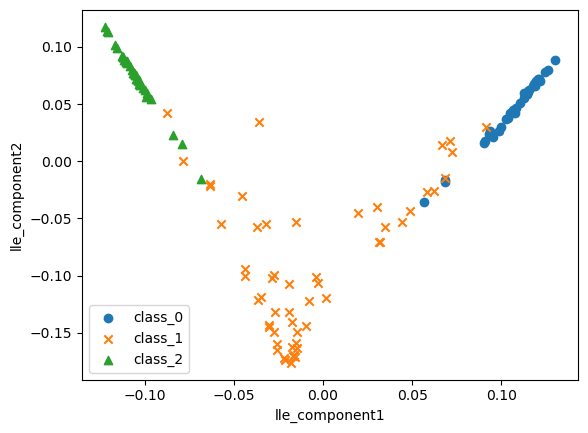

In [12]:
# lle 적용 데이터 시각화
import matplotlib.pyplot as plt
df = X_tn_lle_df
markers = ['o','x','^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = X_i['lle_comp1']
    X2 = X_i['lle_comp2']
    plt.scatter(X1,X2,
                marker=mark,
                label=target_i)
plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

In [13]:
# LLE적용후 랜덤 포레스트 학습 및 예측
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2,
                                random_state=0)
clf_rf.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf.predict(X_te_lle)

In [14]:
# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy_lle = accuracy_score(y_te, pred_rf_lle)
print(accuracy_lle)

0.9333333333333333
